<a href="https://colab.research.google.com/github/OswaldVc/Arduino/blob/main/Regresi%C3%B3n_lineal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

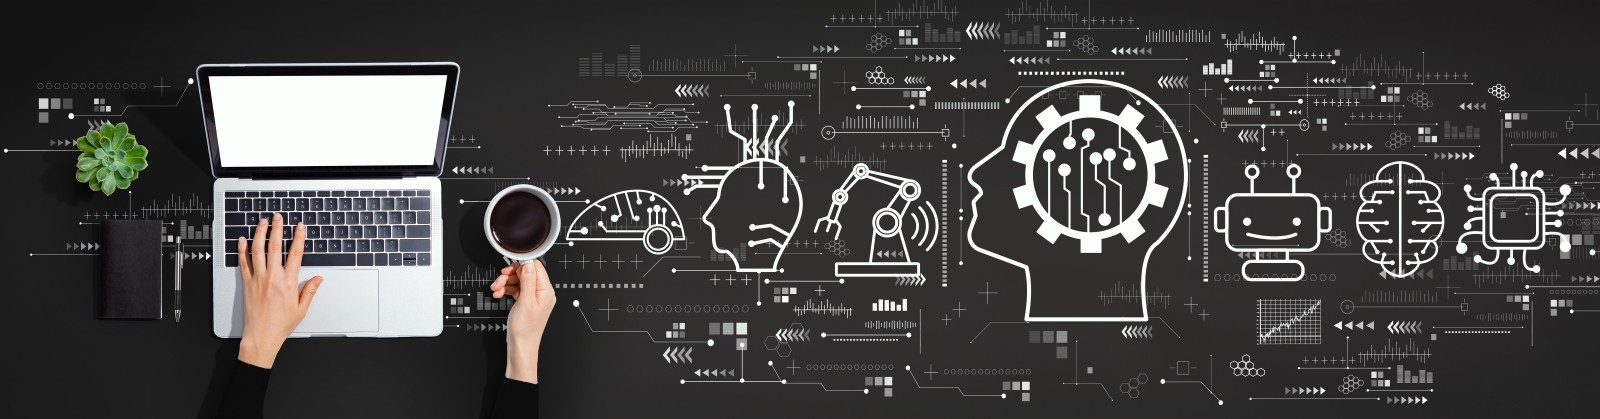

In [65]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
import statsmodels.formula.api  as smf 
from statsmodels.stats.anova import anova_lm  
%matplotlib inline
from sklearn.linear_model import LinearRegression              ## Modelo lineal.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


warnings.filterwarnings('ignore')
url_base ="https://raw.githubusercontent.com/OswaldVc/Datos/main/data/"

#***La descripción de las carácteristicas son:***

- ***Title:*** Titulo del Artículo
- ***url:*** ruta al artículo
- ***Word count:*** la cantidad de palabras del artículo,
- ***of Links:*** los enlaces externos que contiene,
- ***of comments:*** cantidad de comentarios,
- ***Images video:*** suma de imágenes (o videos),
- ***Elapsed days:*** la cantidad de días transcurridos (al momento de crear el archivo)
- ***Shares:*** nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”.

# ***Objetivo:***

A partir de las características de un artículo de machine learning intentaremos predecir, cuantas veces será compartido en Redes Sociales.

In [54]:
df = pd.read_csv(url_base+"articulos_ml.csv")
df.head()

,Title,url,Word_count,# of Links,# of comments,# Images video,Elapsed days,Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [55]:
df.describe()

,Word_count,# of Links,# of comments,# Images video,Elapsed days,Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


De la tabla anterior podemos apreciar que la media de las palabras en los artículos es de ***1808.2608***, El artículo más corto tiene ***250*** palabras y el más extenso ***8401***. Intentaremos ver con nuestra relación lineal, si hay una correlación entre la cantidad de palabras del texto y la cantidad de Shares obtenidos.

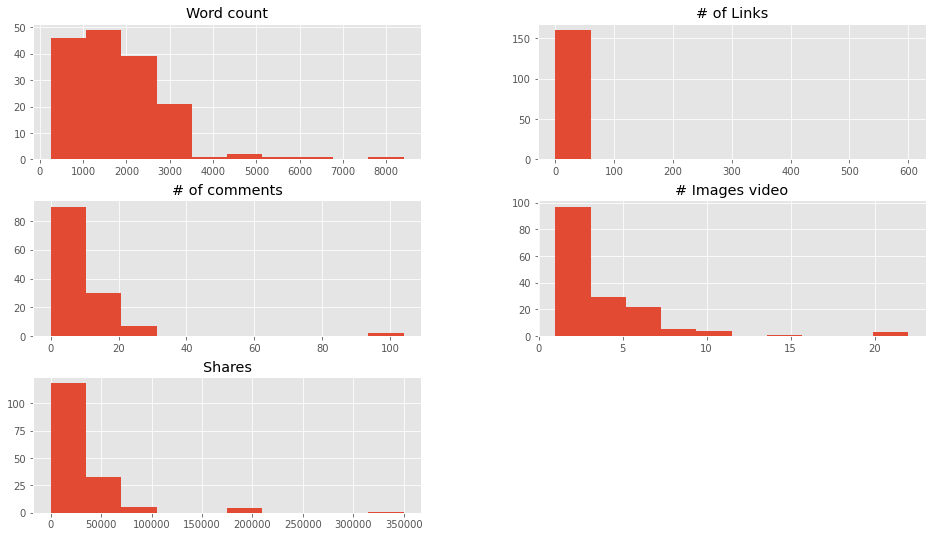

In [43]:
# Visualizamos rápidamente las caraterísticas de entrada:

df.drop(['Title','url', 'Elapsed days',],1).hist()
plt.show()

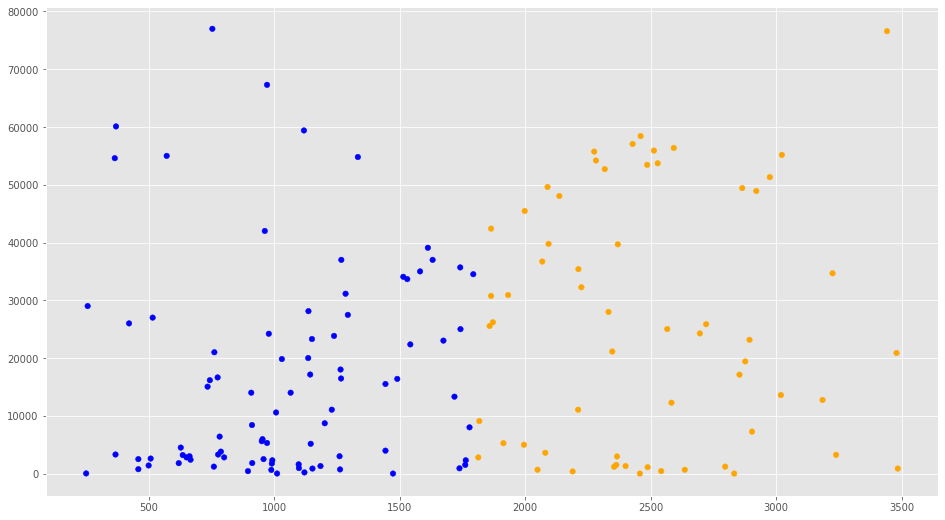

In [56]:

# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000

filtered_df = df[(df['Word_count'] <= 3500) & (df['Shares'] <= 80000)]
 
colores=['orange','blue']
tam=[30,60]
 
f1 = filtered_df['Word_count'].values
f2 = filtered_df['Shares'].values
 

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras

asignar=[]
for index, row in filtered_df.iterrows():
    if(row['Word_count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tam[0])
plt.show()

#Regresión Lineal con Python y SKLearn

Vamos a crear nuestros datos de entrada por el momento sólo Word Count y como etiquetas los Shares. Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.


Por tanto tenemos:

- ***Y:***  Shares
- ***X1:*** Word Count

Y = mX + b



In [57]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_df[["Word_count"]]
X_train = np.array(dataX)
y_train = filtered_df['Shares'].values


# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

print('-----------------------------------------------------------------')
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients:', regr.coef_)
print('-----------------------------------------------------------------')
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term:', regr.intercept_)
print('-----------------------------------------------------------------')
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('-----------------------------------------------------------------')
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))
print('-----------------------------------------------------------------')

-----------------------------------------------------------------
Coefficients: [5.69765366]
-----------------------------------------------------------------
Independent term: 11200.30322307416
-----------------------------------------------------------------
Mean squared error: 372888728.34
-----------------------------------------------------------------
Variance score: 0.06
-----------------------------------------------------------------


De la ecuación de la recta y = mX + b, nuestra pendiente ***m*** es el coeficiente ***5,69*** y el término independiente ***b*** es ***11200***. Tenemos un Error Cuadrático medio enorme, por lo que en realidad este modelo no será muy bueno.  Pero estamos aprendiendo a usarlo, que es lo que nos importa ahora, Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a ***1.0***


#Predicción en regresión lineal simple:

In [58]:
#Vamos a comprobar:

# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:

y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


Primero veamos la relación vía un scatterplot:

In [59]:
fig = px.scatter(df, x = "Word_count", y = "Shares",
                 title = "Scatterplot: Exposure vs. PEFR")
fig.show()

In [60]:
corr_coef = df.corr().iloc[0,1]
print("El coeficiente de correlación de Pearson es: {:.4f}".format(corr_coef))

El coeficiente de correlación de Pearson es: 0.3467


Un modelo de ***regresión lineal simple*** estima cuánto cambiará ***PERF*** cuando ***Exposure***cambie en un
cierta cantidad. Es decir, deseamos explicar si las diferencias en los niveles de ***PERF*** se asocian con las diferencias en los conteos y los compartidos


$$PERF = \beta_0 +\beta_1*Exposure+\epsilon$$ 

$\beta_0$ es una constante conocida como 
el intercepto, $\beta_1$ será la pendiente, ambos de denominan parámetros de la regresión. $\epsilon$ es un error o ruido que NO se logra explicar con el modelo. La ***regresión lineal simple*** trata de encontrar la "mejor" recta para predecir la variable ***Target*** `PEFR` como una función de la ***feature*** ***Exposure***

In [61]:
## Ajuste de regresión con sklearn
model_lm = LinearRegression()

###
model_lm.fit(X_train, y_train)
##
print(f"Intercepto: {model_lm.intercept_:.3f}")
print(f"Coeficiente Exposure: {model_lm.coef_[0]:.3f}")

Intercepto: 11200.303
Coeficiente Exposure: 5.698


En caso que seleccionemos este ajuste muestro modelo será:

$$PEFR = 11200.303+5.698*Exposure+\epsilon$$

La interpretación de los coeficientes es la siguiente:

- $\hat{\beta_0}=11200.303$: Es el intercepto del modelo, note que para un valor de $Exposure=0$, se obtiene que $PEFR=11200.303$, así, se espera que  compartir tenga ese valor medio del indicador de respiración.

- $\hat{\beta_1}=5.698$: Por cada aumento unitario en la variable $Exposure$ se espera que $PEFR$ aumente en promedio el valor en $\hat{\beta_1}$

In [62]:
## Regresión simple, recta de ajuste por OLS.

fig = px.scatter(df, x = "Word_count", y = "Shares", template = "plotly_white",
                 title = "Recta de ajuste por OLS", trendline="ols", 
                 trendline_color_override="yellow")
fig.show()

In [63]:
### With sklearn
fitted = model_lm.predict(X_train) ### Valores ajustados Yi^
resid = y_train - fitted           ### Residuales estimados.

### pd.DataFrame con los primeros resultados del ajuste:

pd.DataFrame({"valor_observado":y_train, "valor_ajustado":fitted,"residual":resid})

,valor_observado,valor_ajustado,residual
0,25000,21125.615894,3874.384106
1,42000,16681.446041,25318.553959
2,21000,15536.217656,5463.782344
3,77000,15490.636427,61509.363573
4,59400,17570.280012,41829.719988
...,...,...,...
143,3239,29655.003419,-26416.003419
144,25019,25820.482508,-801.482508
145,49614,23102.701713,26511.298287
146,33660,19917.713319,13742.286681


In [64]:
model_lm_sm = smf.ols(formula = "Shares ~ Word_count", data = df).fit()     ## Ajuste con statsmodels.
print(model_lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Shares   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.260
Date:                Wed, 23 Nov 2022   Prob (F-statistic):             0.0729
Time:                        14:38:05   Log-Likelihood:                -1945.5
No. Observations:                 161   AIC:                             3895.
Df Residuals:                     159   BIC:                             3901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.821e+04   6376.499      2.855      0.0

In [66]:
## With statsmodels. from statsmodels.stats.anova import anova_lm ---> Anova del modelo lineal 
anova_lm(model_lm_sm, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Word_count,1.0,6.056447e+09,6.056447e+09,3.259633,0.072897
Residual,159.0,2.954244e+11,1.858015e+09,NaN,NaN
